# Rainfall Prediction Model Using Random Forest Algorithm

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [112]:
data = pd.read_csv("../dataset/Rainfall.csv")
data.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [113]:
data.shape

(366, 12)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [115]:
data.duplicated().sum()

np.int64(0)

In [116]:
data.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [117]:
# Assuming df is your DataFrame
data.columns = data.columns.str.strip()

In [118]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [119]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [120]:
percentages = data['rainfall'].value_counts(normalize=True) * 100
print(percentages)

rainfall
yes    68.032787
no     31.967213
Name: proportion, dtype: float64


In [121]:
data.sample(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
230,18,1008.0,33.8,30.2,28.4,25.8,78,67,yes,10.2,220.0,18.1
21,22,1018.9,16.2,14.1,10.3,12.9,92,100,yes,0.0,50.0,35.3
171,20,1008.5,34.4,30.8,28.6,26.3,78,59,yes,9.1,170.0,12.1
60,1,1024.7,19.7,16.5,14.6,11.5,73,43,no,9.9,70.0,34.2
307,3,1019.5,25.8,23.7,22.3,18.8,74,82,yes,2.4,70.0,32.9
287,14,1017.4,28.2,25.0,23.1,20.1,75,51,no,7.4,70.0,23.9
296,23,1013.0,30.7,27.0,24.8,21.6,73,50,no,8.3,80.0,9.9
160,9,1005.7,31.7,28.2,26.6,25.7,86,79,yes,6.5,NaN,NaN
129,9,1010.1,30.6,28.7,26.9,25.0,81,69,no,3.9,170.0,16.3
293,20,1008.3,29.1,26.2,23.8,17.3,58,78,no,7.5,10.0,17.2


In [122]:
# dropping the unwanted features
data = data.drop("day", axis=1)
data.sample(10)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
198,1008.5,33.2,30.6,29.0,26.2,78,69,no,9.2,230.0,23.7
174,1008.4,34.1,30.4,28.4,24.7,72,20,no,11.4,210.0,9.6
150,1008.8,32.1,29.8,28.0,26.0,80,73,yes,9.8,220.0,22.8
26,1022.7,15.3,13.0,9.8,11.6,92,95,yes,0.2,20.0,29.6
284,1018.0,22.1,20.5,18.5,16.6,78,88,yes,0.0,20.0,38.3
303,1017.8,29.6,26.7,25.3,23.1,81,53,no,8.4,100.0,16.5
225,1007.9,29.6,28.0,26.4,25.6,87,84,yes,0.1,230.0,22.9
231,1007.7,32.8,30.1,28.1,25.7,77,59,no,10.4,230.0,16.6
160,1005.7,31.7,28.2,26.6,25.7,86,79,yes,6.5,NaN,NaN
251,1009.4,30.7,27.9,26.4,23.1,75,60,no,8.3,60.0,29.0


In [123]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [124]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [125]:
data["winddirection"].median()

np.float64(70.0)

In [126]:
data["winddirection"].mode()

0    20.0
Name: winddirection, dtype: float64

In [127]:
data["windspeed"].median()

np.float64(20.5)

In [128]:
data["windspeed"].mean()

np.float64(21.53698630136986)

In [129]:
data["windspeed"].mode()

0    14.5
Name: windspeed, dtype: float64

In [130]:
# filling the missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [131]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [132]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [133]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [134]:
# encoding the rainfall feature into numerical: yes-->1, no-->0
data["rainfall"] = data["rainfall"].replace(
    {"yes": 1, "no": 0}
)

/tmp/ipykernel_11964/1650937539.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["rainfall"] = data["rainfall"].replace(


In [135]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [136]:
sns.set_theme(
    style="whitegrid",
    context="notebook",  # or "paper", "talk", "poster"
    palette="deep",
    font="sans-serif",
    font_scale=1,
    rc=None
)

In [137]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [138]:
data.corr()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
pressure,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.089275,-0.198171,-0.656828,0.373587
maxtemp,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,-0.101003,0.507416,0.625447,-0.442095
temparature,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,-0.037360,0.420545,0.645266,-0.393619
mintemp,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,-0.007697,0.368288,0.629738,-0.359013
dewpoint,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.139916,0.185234,0.623952,-0.378227
humidity,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,0.489623,-0.563579,0.099471,-0.076740
cloud,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,0.625766,-0.848334,-0.077037,0.258248
rainfall,-0.089275,-0.101003,-0.037360,-0.007697,0.139916,0.489623,0.625766,1.000000,-0.552519,-0.015058,0.154193
sunshine,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,-0.552519,1.000000,0.251374,-0.298922
winddirection,-0.656828,0.625447,0.645266,0.629738,0.623952,0.099471,-0.077037,-0.015058,0.251374,1.000000,-0.219379


In [139]:
data.shape

(366, 11)

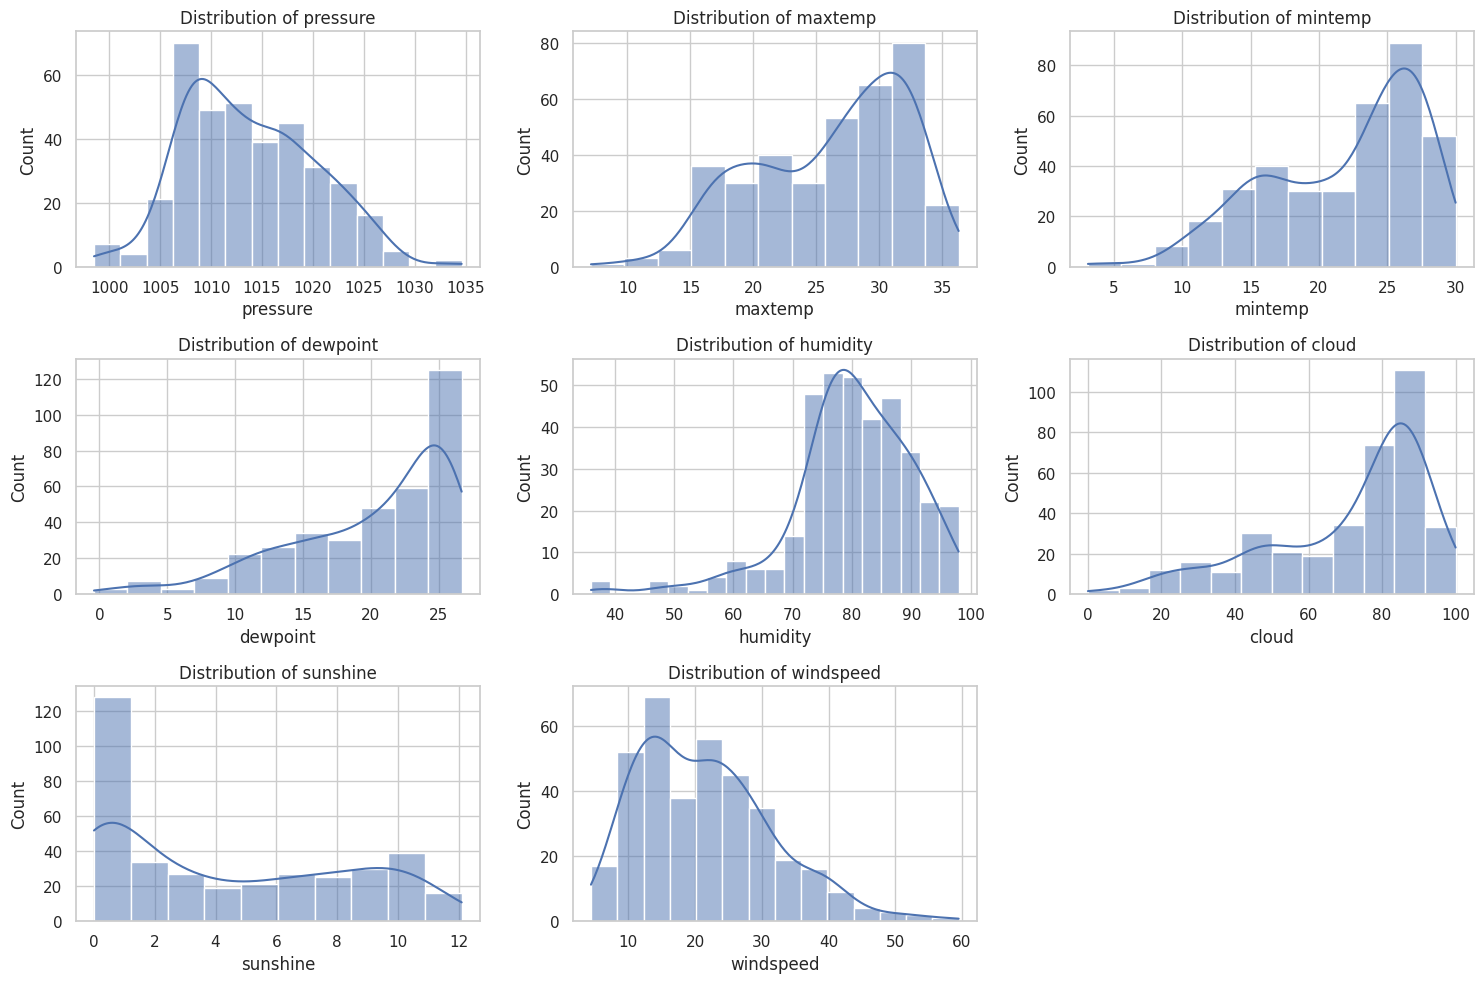

In [141]:
# plotting
plot_columns = ["pressure", "maxtemp", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "windspeed"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(plot_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()